In [1]:
####第一题
def Print_values(a,b,c):
    if a>b:
        if b>c:
            x = a
            y = b
            z = c
        else:
            if a>c:
                x = a
                y = c
                z = b
            else:
                x = c
                y = a
                z = b
    else:
        if b>c:
            print()
        else:
            x = c
            y = b
            z = a
    print(x+y-10*z)


Print_values(10,5,1)

5


In [5]:
####第二题
import math

def F(x, memo):
    # 基础情况
    if x == 1:
        return 1

    # 如果值已计算过，直接返回
    if x in memo:
        return memo[x]

    # 递归计算
    result = F(math.ceil(x / 3), memo) + 2 * x
    memo[x] = result  # 将结果存储到 memo 字典中

    return result

def calculate_F_for_list(input_list):
    memo = {}  # 用于记忆化存储已计算的 F(x) 值
    results = []

    for x in input_list:
        results.append(F(x, memo))

    return results


input_list = [1, 5]
results = calculate_F_for_list(input_list)
print(results)

[1, 15]


In [1]:
####第三题
####3.1
def Find_number_of_ways(x):
    # 初始化动态规划数组，dp[i][j] 表示使用 i 个骰子得到和为 j 的方式数
    dp = [[0] * (x + 1) for _ in range(11)]
    dp[0][0] = 1  # 初始条件：0 个骰子得到和为 0 的方式数为 1

    # 迭代计算每个骰子和每个可能的和
    for i in range(1, 11):
        for j in range(1, x + 1):
            dp[i][j] = 0  # 初始化 dp[i][j] 为 0
            
            # 手动展开 sum 表达式，逐步计算 dp[i][j]
            for k in range(1, 7):  # k 从 1 到 6，表示骰子的每一面
                if j - k >= 0:  # 只考虑索引有效的情况
                    dp[i][j] += dp[i - 1][j - k]  # 累加 dp[i-1][j-k] 的值

    return dp[10][x]
####3.2
# 计算从 10 到 60 的每个和的方式数
num_dice = 10
num_faces = 6
Number_of_ways = []

for x in range(10, 61):
    ways = Find_number_of_ways(x)
    Number_of_ways.append(ways)

# 找到使得方式数最多的和
max_ways = max(Number_of_ways)
max_x = 10 + Number_of_ways.index(max_ways)

print("The value of x that yields the maximum number of ways is:",max_x)
print("The maximum number of ways is:",max_ways)


The value of x that yields the maximum number of ways is: 35
The maximum number of ways is: 4395456


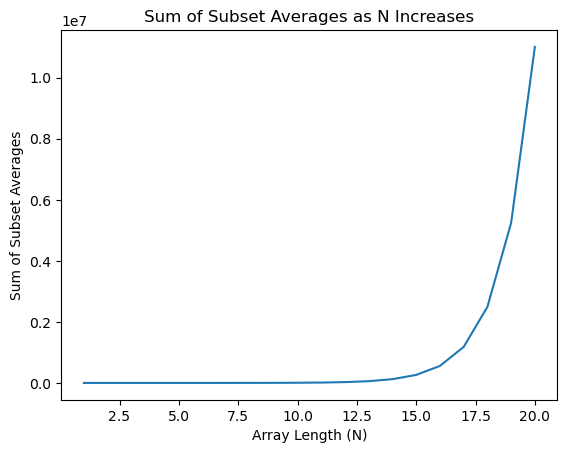

[1.0, 4.5, 14.0, 37.5, 93.0, 220.5, 508.0, 1147.5000000000002, 2555.000000000001, 5626.5, 12281.999999999996, 26617.499999999996, 57336.99999999999, 122872.50000000001, 262135.99999999994, 557047.5000000001, 1179638.9999999998, 2490358.500000001, 5242870.000000004, 11010037.500000006]


In [3]:
####第四题
####4.1
import random

# 定义一个生成随机整数数组的函数
def Random_integer(N):
    random_array = []  # 初始化一个空列表用于存储随机数
    for i in range(N):
        random_num = random.randint(0, 10)  # 生成一个 0 到 10 的随机整数
        random_array.append(random_num)  # 将生成的随机整数添加到列表中
    return random_array


####4.2
# 生成所有子集的函数
def generate_subsets(arr):
    subsets = [[]]  # 初始化一个空集

    # 遍历数组中的每一个元素
    for i in range(len(arr)):
        num = arr[i]  # 当前的元素

        new_subsets = []
        for j in range(len(subsets)):  # 遍历当前的所有子集
            current_subset = subsets[j]
            new_subset = current_subset + [num]  # 把 num 加到现有的子集上
            new_subsets.append(new_subset)  # 把新的子集添加到新生成的子集中

        # 将新生成的子集加入到总的子集中
        for k in range(len(new_subsets)):
            subsets.append(new_subsets[k])

    return subsets
 

# 计算所有子集平均值之和的函数
def Sum_averages(arr):
    subsets = generate_subsets(arr)  # 生成所有子集
    total_sum = 0

    # 遍历所有生成的子集
    for i in range(len(subsets)):
        subset = subsets[i]
        if len(subset) > 0:  # 忽略空子集
            subset_sum = 0

            # 计算子集的总和
            for j in range(len(subset)):
                subset_sum += subset[j]

            # 计算子集的平均值，并将其加到总和中
            total_sum += subset_sum / len(subset)

    return total_sum

####4.3
import matplotlib.pyplot as plt

Total_sum_averages = []  # 存储所有 N 值下的 Sum_averages 结果

for N in range(1, 21):  # N 从 1 增加到 100
    arr = list(range(1, N+1))  # 生成 1 到 N 的数组
    result = Sum_averages(arr)  # 调用 Sum_averages 函数
    Total_sum_averages.append(result)  # 将结果添加到列表中


plt.plot(range(1, 21), Total_sum_averages)
plt.xlabel('Array Length (N)')
plt.ylabel('Sum of Subset Averages')
plt.title('Sum of Subset Averages as N Increases')
plt.show()


print(Total_sum_averages)

In [13]:
####第五题
####5.1
import random


# 创建一个N行M列的矩阵，并随机填充0或1，左上角和右下角始终为1
def create_random_matrix(N, M):
    matrix = [[random.randint(0, 1) for _ in range(M)] for _ in range(N)]
    matrix[0][0] = 1  # 左上角始终为1
    matrix[N - 1][M - 1] = 1  # 右下角始终为1
    return matrix


####5.2
# 计算从左上角到右下角的总路径数
def Count_path(matrix, i, j, N, M):
    # 如果当前点超出矩阵边界，或者是障碍（值为0），则无法通过
    if i >= N or j >= M or matrix[i][j] == 0:
        return 0

    # 如果当前点是右下角，说明找到一条路径
    if i == N - 1 and j == M - 1:
        return 1

    # 递归向右和向下移动
    right_paths = Count_path(matrix, i, j + 1, N, M)  # 向右移动
    down_paths = Count_path(matrix, i + 1, j, N, M)  # 向下移动

    # 返回两种移动方式的总和
    return right_paths + down_paths


####5.3
# 运行Count_path函数1000次并计算平均路径数
def run_simulation(N, M, num_runs):
    total_paths = 0
    for _ in range(num_runs):
        matrix = create_random_matrix(N, M)  # 创建随机矩阵
        total_paths += Count_path(matrix, 0, 0, N, M)  # 计算路径数并累加
    mean_paths = total_paths / num_runs  # 计算平均路径数
    return mean_paths


# 设置 N = 10, M = 8, 运行1000次
N = 10
M = 8
num_runs = 1000


mean_total_paths = run_simulation(N, M, num_runs)
print("1000次运行后路径总数的平均值:", mean_total_paths)

1000次运行后路径总数的平均值: 0.587
